# Notebook 3: CNN Model

The objective of this project is to create an image classification model by classifying x-rays whether someone has pneumonia or not. The tutorial I followed to run a convolutional neural network to identify whether one has pneumonia or not can be found from [tensorflow.com](https://www.tensorflow.org/tutorials/images/classification)



In [1]:
import glob
import sys
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For reproducible results:
from numpy.random import seed
seed(1)
%matplotlib inline

The dataset has the following directory structure:

<pre>
<b>data</b>
|__ <b>train</b>
    |______ <b>PNEUMONIA</b>: [pneumonia_0.jpg, pneumonia_1.jpg, pneumonia_2.jpg ....]
    |______ <b>NORMAL</b>: [normal_0.jpg, normal_1.jpg, normal_2.jpg ...]
|__ <b>test</b>
    |______ <b>PNEUMONIA</b>: [pneumonia_0.jpg, pneumonia_1.jpg, pneumonia_2.jpg ....]
    |______ <b>NORMAL</b>: [normal_0.jpg, normal_1.jpg, normal_2.jpg ...]
</pre>

In [2]:
train_directory = '../data/train/'
test_directory = '../data/test/'

normal_tr = glob.glob('../data/train/NORMAL/*.jpeg')
pneumonia_tr = glob.glob('../data/train/PNEUMONIA/*.jpeg')

normal_test = glob.glob('../data/test/NORMAL/*.jpeg')
pneumonia_test = glob.glob('../data/test/PNEUMONIA/*.jpeg')


print(f"Total training normal images: {len(normal_tr)}")
print(f"Total training pneumonia images: {len(pneumonia_tr)}")
print(f"Total test normal images: {len(normal_test)}")
print(f"Total train normal images: {len(pneumonia_test)}")
print("--")
print("Total training images:", len(glob.glob('../data/train/*/*.jpeg')))
print("Total test images:", len(glob.glob('../data/test/*/*.jpeg')))

Total training normal images: 1341
Total training pneumonia images: 3875
Total test normal images: 242
Total train normal images: 398
--
Total training images: 5216
Total test images: 640


Loading `train_data` and `test_data` which are the images transformed into floating point tensors.

In [3]:
%run '../assets/tensor_data.py'

Found 5216 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [4]:
# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
# list of objects
variables = [x for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars]

if 'train_data' in variables and 'test_data' in variables:
    print('train_data and test_data have successfully been imported.')
else:
    print('train_data and test_data have not been imported.')

train_data and test_data have successfully been imported.


## Convolutional Neural Network

Keras' Convolutional Neural Network model was implemented to classify whether a patient has pneumonia. There are 9 layers that consist of multiple **convolutional 2D layers**, **max pooling layers**, and a single **flatten layer**. A CNN is used to capture the spatial distributions in an image by applying the aforementioned filters. 

The first Conv2D is the input layer which takes in the images that have been converted to 224x224x3 floating point tensors.

In [5]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
batch_size = 128
epochs = 15

In [7]:
total_train_images = len(glob.glob('../data/train/*/*.jpeg'))
total_test_images = len(glob.glob('../data/test/*/*.jpeg'))


In [8]:
history = model.fit_generator(
    train_data,
    steps_per_epoch = total_train_images // batch_size,
    epochs = epochs,
    validation_data = train_data,
    validation_steps = total_test_images // batch_size
)

Epoch 1/15
40/40 [==============================] - 85s 2s/step - loss: 0.5011 - accuracy: 0.7648 - val_loss: 0.4289 - val_accuracy: 0.8000
Epoch 2/15
40/40 [==============================] - 72s 2s/step - loss: 0.3883 - accuracy: 0.8195 - val_loss: 0.3445 - val_accuracy: 0.8438
Epoch 3/15
40/40 [==============================] - 105s 3s/step - loss: 0.3094 - accuracy: 0.8719 - val_loss: 0.3856 - val_accuracy: 0.8188
Epoch 4/15
40/40 [==============================] - 92s 2s/step - loss: 0.2960 - accuracy: 0.8687 - val_loss: 0.3567 - val_accuracy: 0.8313
Epoch 5/15
40/40 [==============================] - 92s 2s/step - loss: 0.2497 - accuracy: 0.8938 - val_loss: 0.2603 - val_accuracy: 0.8938
Epoch 6/15
40/40 [==============================] - 97s 2s/step - loss: 0.2556 - accuracy: 0.8938 - val_loss: 0.2268 - val_accuracy: 0.8938
Epoch 7/15
40/40 [==============================] - 73s 2s/step - loss: 0.2488 - accuracy: 0.8922 - val_loss: 0.2092 - val_accuracy: 0.9187
Epoch 8/15
40/40 [=

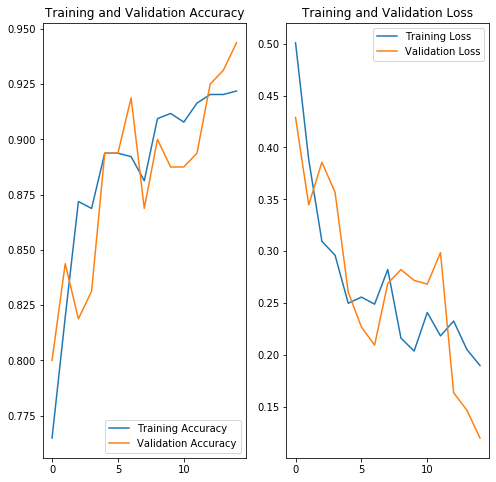

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
y_pred = model.predict(train_data)

In [17]:
y_pred[:,0]

array([0.04389518, 0.99996614, 0.9920723 , ..., 0.99749625, 0.99981433,
       0.99675846], dtype=float32)